In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import xgboost
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import shap
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\PMLS\\Downloads\\bank+marketing\\bank\\bank-full.csv",sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Checkinng Null Values in Our Data Set 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Exploratory Data Analysis

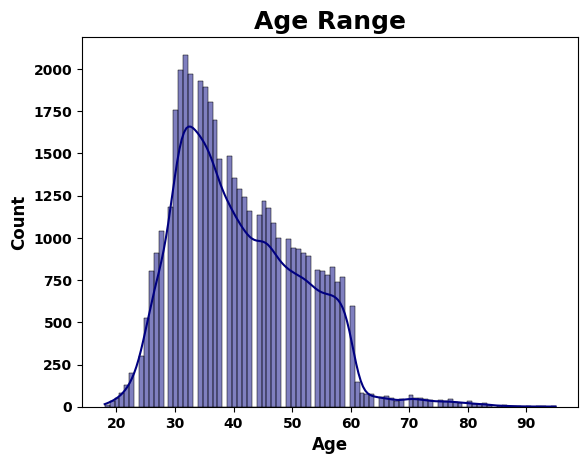

In [4]:
# Checking The Age Range Using Histogram
sns.histplot(data=df,x=df['age'],kde=True,color='navy')
plt.xlabel("Age",fontsize=12,fontweight='bold')
plt.ylabel("Count",fontsize=12,fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.title("Age Range",fontsize=18,fontweight='bold')
plt.show()

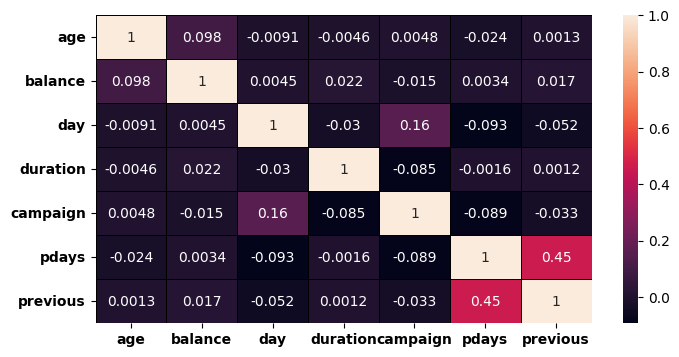

In [5]:
# Checking Relationship Between Variables
cm=df.select_dtypes(include='number').corr()
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True,linecolor='black',linewidths=.4)
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

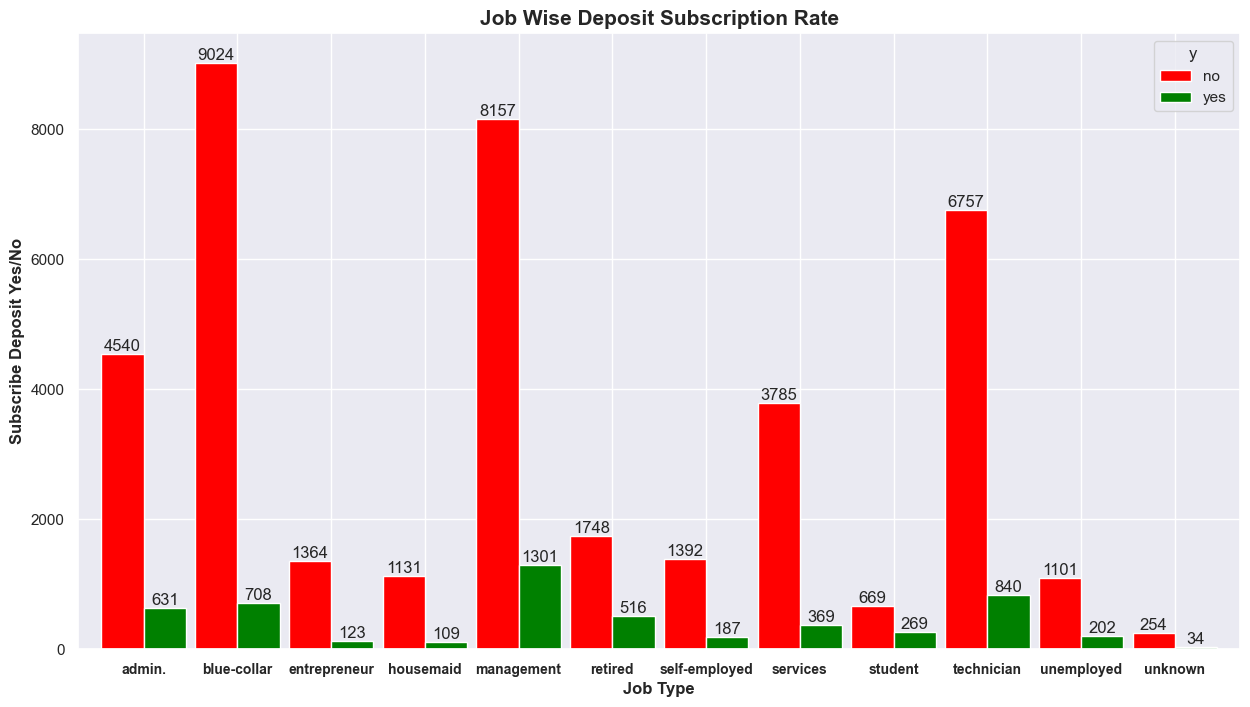

In [6]:
# Checking Job Wise Deposit Subscription Rate
sns.set()
ax=pd.crosstab(df['job'],df['y']).plot(kind='bar',color=['red','green'],figsize=(15,8),width=.9)
for bar in ax.containers:
    ax.bar_label(bar)
plt.xlabel("Job Type",fontsize=12,fontweight='bold')
plt.ylabel("Subscribe Deposit Yes/No",fontsize=12,fontweight='bold')
plt.title("Job Wise Deposit Subscription Rate",fontsize=15,fontweight='bold')
plt.xticks(rotation=0,fontsize=10,fontweight='bold')
plt.show()

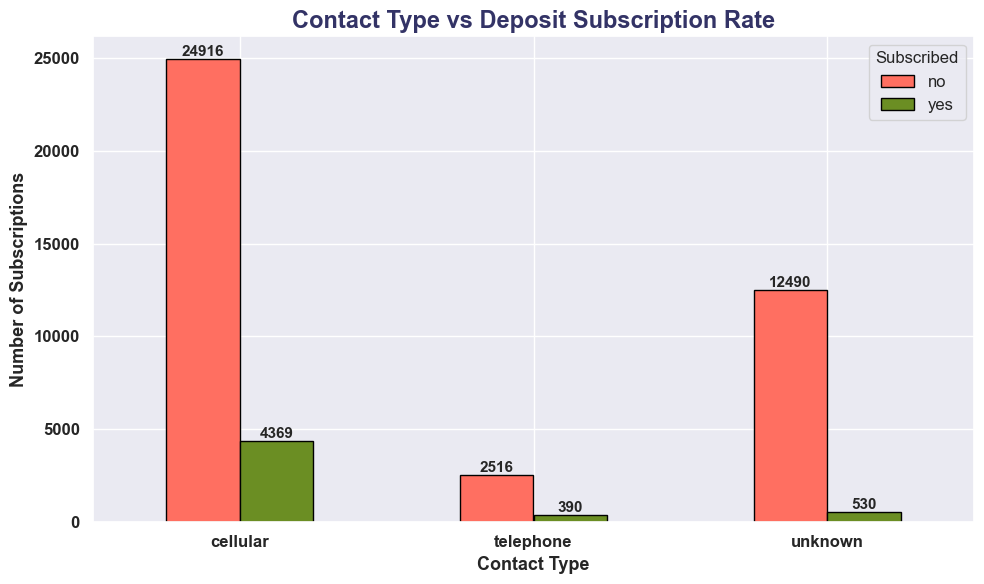

In [7]:
# Improved Contact Type vs Deposit Subscription Rate Plot
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
contact_ct = pd.crosstab(df['contact'], df['y'])
contact_ct.plot(kind='bar', color=['#FF6F61', '#6B8E23'], ax=ax, width=0.5, edgecolor='black')
for bar in ax.containers:
    ax.bar_label(bar, fontsize=11, fontweight='bold')
plt.xlabel("Contact Type", fontsize=13, fontweight='bold')
plt.ylabel("Number of Subscriptions", fontsize=13, fontweight='bold')
plt.title("Contact Type vs Deposit Subscription Rate", fontsize=17, fontweight='bold', color='#333366')
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.legend(title="Subscribed", fontsize=12)
plt.tight_layout()
plt.show()

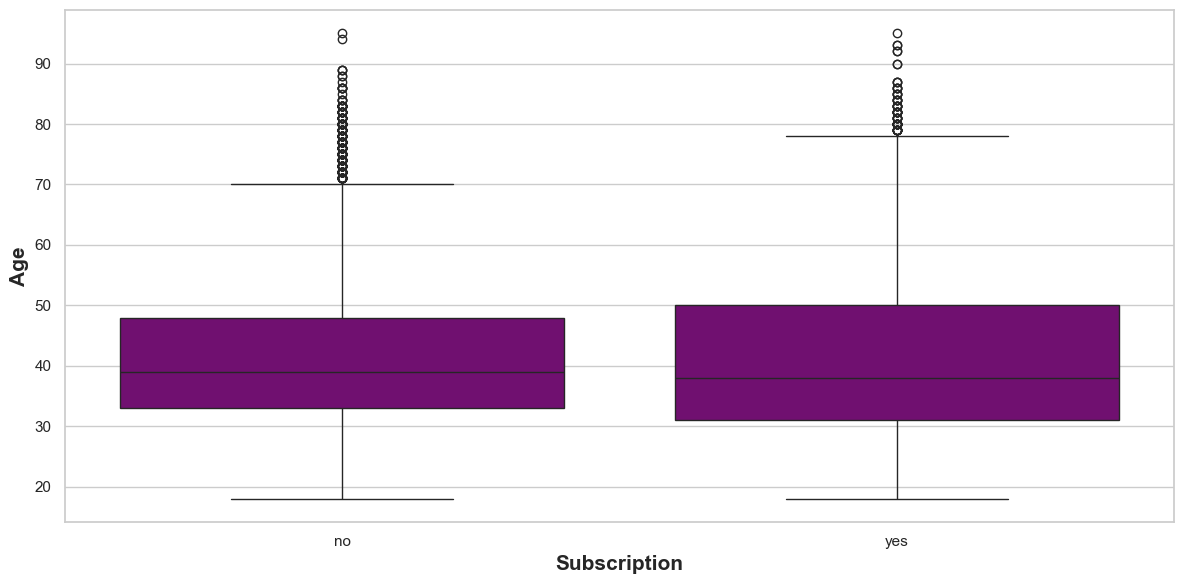

In [8]:
# Explroing age range in subscribing the deposit
plt.figure(figsize=(12,6))
sns.set(style="whitegrid", palette="pastel")
# Add swarmplot for individual data points
sns.boxplot(x=df['y'],y=df['age'],color='purple')
plt.ylabel("Age",fontsize=15,fontweight='bold')
plt.xlabel("Subscription",fontsize=15,fontweight='bold')
plt.tight_layout()

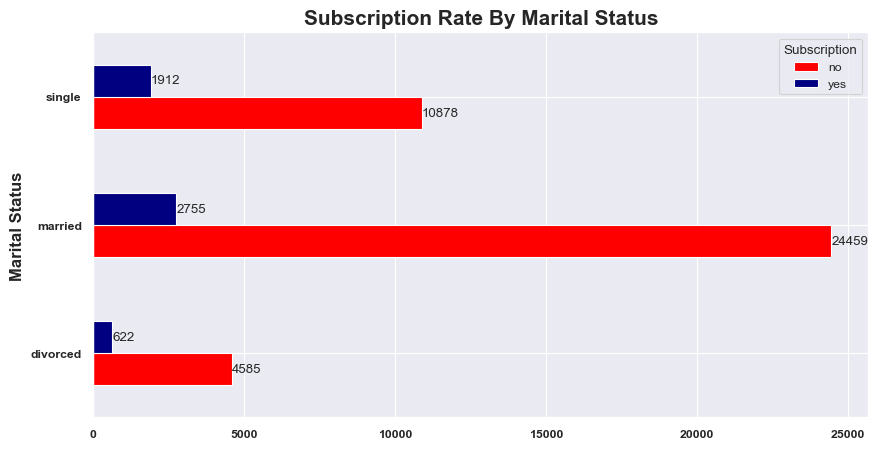

In [9]:
# Marital Status wise Subscription rate
marital_status=pd.crosstab(df['marital'],df['y'])

sns.set_theme('paper')
ax=marital_status.plot(kind='barh',color=['red','navy'],figsize=(10,5))
for bar in ax.containers:
    ax.bar_label(bar)
plt.ylabel("Marital Status",fontsize=12,fontweight='bold')
plt.title("Subscription Rate By Marital Status",fontsize=15,fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.legend(title='Subscription')

In [10]:
y=df['y']
X=df.drop(['y'],axis=1)



Encoding

In [11]:
y=y.map({'no':0,'yes':1})

In [12]:
X['job']=X['job'].map({'management':0, 'technician':1, 'entrepreneur':2, 'blue-collar':3,
       'unknown':4, 'retired':5, 'admin.':6, 'services':7, 'self-employed':8,
       'unemployed':9, 'housemaid':10, 'student':11})
X['marital']=X['marital'].map({'single':0,'married':1,'divorced':2})
X['contact']=X['contact'].map({"cellular":0,"telephone":1,"unknown":2})

In [13]:
X['education']=X['education'].map({'tertiary':2, 'secondary':1, 'unknown':3, 'primary':0})
X['month']=X['month'].map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2,
       'mar':3, 'apr':4, 'sep':9})
X['housing']=X['housing'].map({'no':0,'yes':1})
X['loan']=X['loan'].map({'no':0,'yes':1})
X['poutcome']=X['poutcome'].map({'failure':0,'success':1,'other':2,'unknown':3})
X['default']=X['default'].map({'no':0,'yes':1})

Data Spliting For Training And Testing

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30,random_state=42)

Scaling The Data 

In [15]:
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.fit_transform(X_test)

In [16]:
X.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

Logistic Regression

In [17]:
def logistic_regression(params):
   model=LogisticRegression()
   grd_lr=GridSearchCV(model,param_grid=params,cv=5)
   grd_lr.fit(X_train_scaled,Y_train)
   best_model=grd_lr.best_estimator_
   y_pred=best_model.predict(X_test_scaled)
   return y_pred,best_model
params={
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200]
}
Logistic_Regression=logistic_regression(params)
Logistic_Regression[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

              precision    recall  f1-score   support

          No       0.98      0.90      0.94     12952
         Yes       0.22      0.56      0.31       612

    accuracy                           0.89     13564
   macro avg       0.60      0.73      0.63     13564
weighted avg       0.94      0.89      0.91     13564



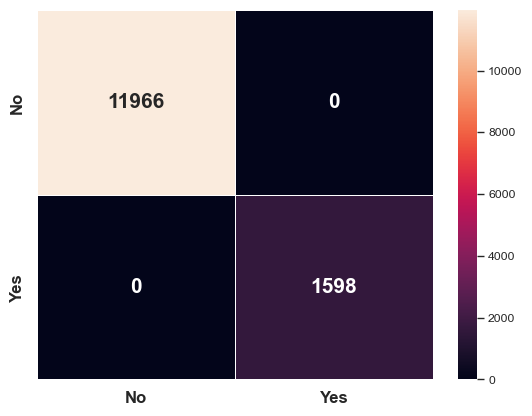

In [18]:
def model_evaluation(predictions,class_names):
    print(classification_report(predictions,Y_test,target_names=class_names))
def Confusion_Matrix(predictions,class_names):
    cm=confusion_matrix(predictions,Y_test)
    df_cm=pd.DataFrame(cm,index=class_names,columns=class_names)
    sns.heatmap(df_cm,annot=True,fmt='d',linecolor='white',linewidths=.6,annot_kws={
        'size':15,'weight':'bold'
    })
    plt.xticks(fontweight='bold',fontsize=12)
    plt.yticks(fontweight='bold',fontsize=12)

class_names={"No":0,"Yes":1}
model_evaluation(Logistic_Regression[0],class_names)
Confusion_Matrix(Y_test,class_names)

K Nearest Neghbors

In [19]:
def Knn(params):
    model=KNeighborsClassifier()
    grd_knn=GridSearchCV(model,param_grid=params,cv=5)
    grd_knn.fit(X_train_scaled,Y_train)
    best_model=grd_knn.best_estimator_
    y_pred=best_model.predict(X_test_scaled)
    return y_pred,best_model

params={
    'n_neighbors':[2,4,6,8,10,12],
    'metric':['euclidean','manhattan'],
    'weights':['uniform','distance']
}
knn=Knn(params)
knn[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

              precision    recall  f1-score   support

          No       0.98      0.91      0.94     12846
         Yes       0.29      0.65      0.40       718

    accuracy                           0.90     13564
   macro avg       0.64      0.78      0.67     13564
weighted avg       0.94      0.90      0.92     13564



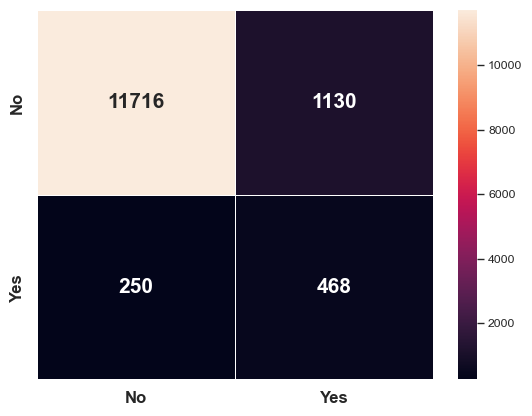

In [20]:
model_evaluation(knn[0],class_names)
Confusion_Matrix(knn[0],class_names)

Decision Tree

In [21]:
def Decision_Tree(param):
    model=DecisionTreeClassifier()
    grd_dsc=GridSearchCV(model,param_grid=param,cv=5)
    grd_dsc.fit(X_train_scaled,Y_train)
    best_model=grd_dsc.best_estimator_
    y_pred=best_model.predict(X_test_scaled)
    return y_pred,best_model

params_grid={
    'max_depth':[2,4,6,8,10,14],
    'max_features':[None, 'sqrt', 'log2', 0.25, 0.5, 0.75, 1,8,16],
    'criterion':['entropy','gini']
}
decision_tree=Decision_Tree(params_grid)
decision_tree[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

              precision    recall  f1-score   support

          No       0.96      0.93      0.94     12365
         Yes       0.45      0.60      0.51      1199

    accuracy                           0.90     13564
   macro avg       0.70      0.76      0.73     13564
weighted avg       0.91      0.90      0.91     13564



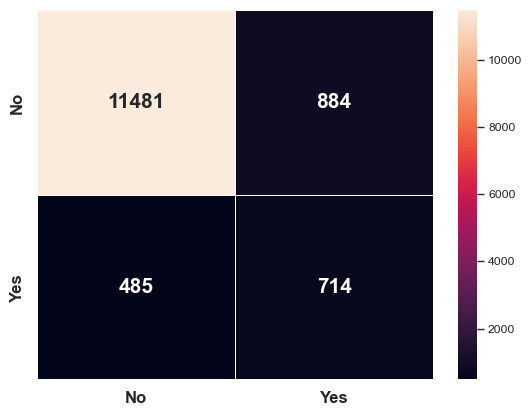

In [22]:
model_evaluation(decision_tree[0],class_names)
Confusion_Matrix(decision_tree[0],class_names)

In [25]:
def Random_Forest(params):
   model=RandomForestClassifier()
   grd_rfc=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,n_iter=20,n_jobs=-1,random_state=42)
   grd_rfc.fit(X_train_scaled,Y_train)
   best_model=grd_rfc.best_estimator_
   y_pred=best_model.predict(X_test_scaled)
   return y_pred,best_model

param_grid1={
    'n_estimators':[10,50,100],
    'max_depth':[5,10,15],
    'max_features':[2,3,4,5,6,7,8,9,10,13,16],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap':[True,False]
}
random_forest=Random_Forest(param_grid1)
random_forest[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

              precision    recall  f1-score   support

          No       0.96      0.93      0.95     12379
         Yes       0.46      0.62      0.53      1185

    accuracy                           0.90     13564
   macro avg       0.71      0.78      0.74     13564
weighted avg       0.92      0.90      0.91     13564



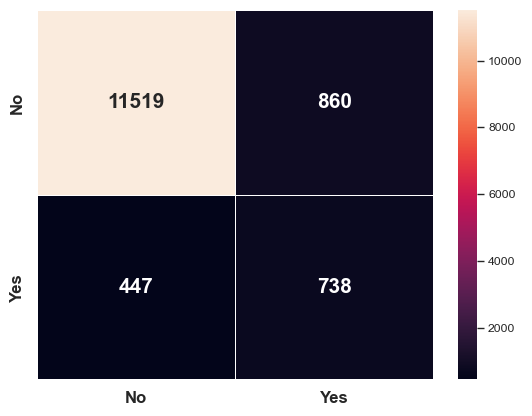

In [26]:
model_evaluation(random_forest[0],class_names)
Confusion_Matrix(random_forest[0],class_names)

In [28]:
# Use fitted model objects, not prediction arrays
classifiers=[
    ('Logistic Regression', Logistic_Regression[1]),
    ('K Nearest Neighbors', knn[1]),
    ('Decision Tree', decision_tree[1]),
    ('Random Forest', random_forest[1])
]

def voting_classifier(n_estimators):
    model = VotingClassifier(estimators=n_estimators, voting='hard')
    model.fit(X_train_scaled, Y_train)
    y_pred = model.predict(X_test_scaled)
    return y_pred, model

Voting_Classifier = voting_classifier(classifiers)
Voting_Classifier[0]  

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

              precision    recall  f1-score   support

          No       0.98      0.91      0.94     12877
         Yes       0.28      0.65      0.39       687

    accuracy                           0.90     13564
   macro avg       0.63      0.78      0.67     13564
weighted avg       0.94      0.90      0.92     13564



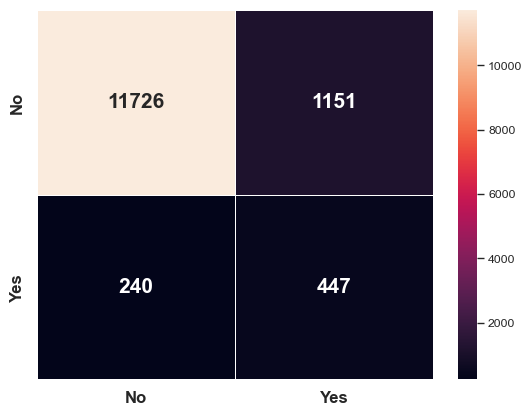

In [29]:
model_evaluation(Voting_Classifier[0],class_names)
Confusion_Matrix(Voting_Classifier[0],class_names)

In [30]:
def Xgboost(params):
    model=xgboost.XGBClassifier()
    grd_xgb=GridSearchCV(model,param_grid=params,n_jobs=-1,cv=5)
    grd_xgb.fit(X_train_scaled,Y_train)
    best_model=grd_xgb.best_estimator_
    y_pred=best_model.predict(X_test_scaled)
    return y_pred,best_model
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 6],
    'min_child_weight': [1, 3],
    'subsample': [0.8],  # fixed to reduce complexity
    'colsample_bytree': [0.8],  # fixed to reduce complexity
    'reg_alpha': [0, 0.1]
}
xgb=Xgboost(params)
xgb[0]

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

          No       0.96      0.93      0.94     12267
         Yes       0.49      0.60      0.54      1297

    accuracy                           0.90     13564
   macro avg       0.72      0.77      0.74     13564
weighted avg       0.91      0.90      0.91     13564



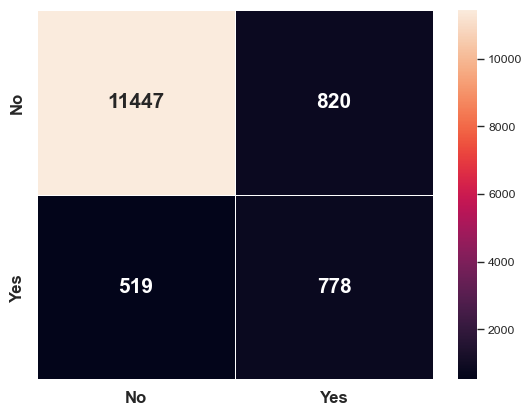

In [32]:
model_evaluation(xgb[0],class_names)
Confusion_Matrix(xgb[0],class_names)

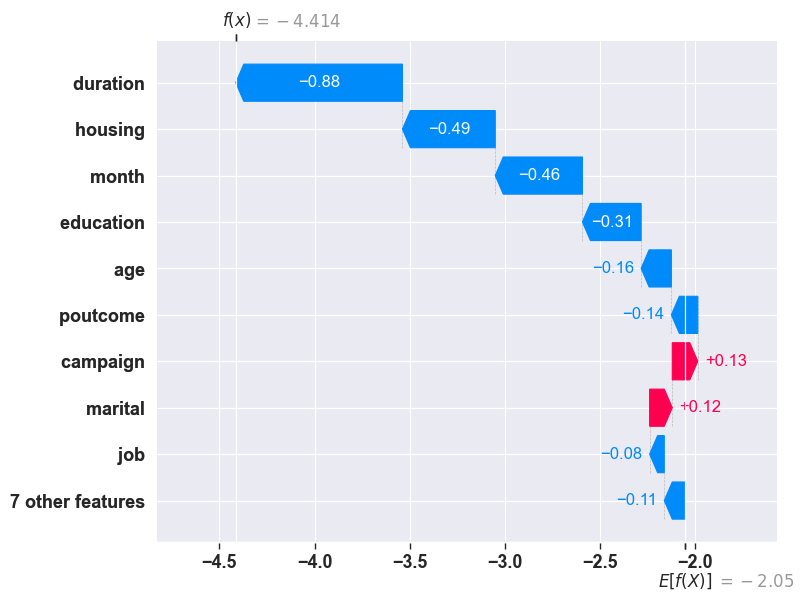

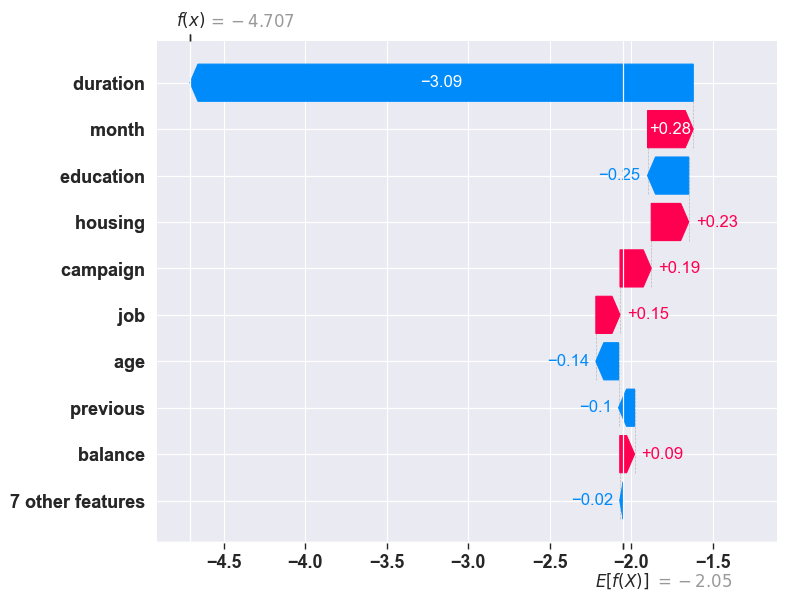

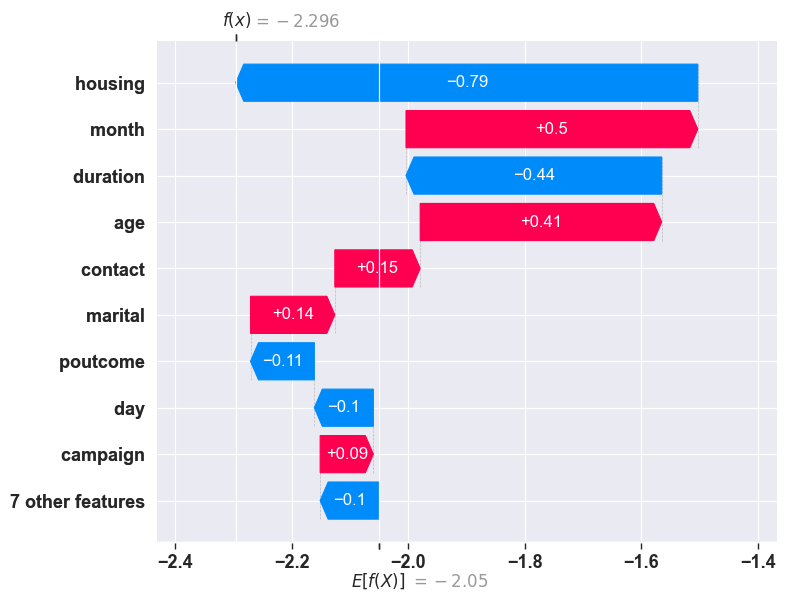

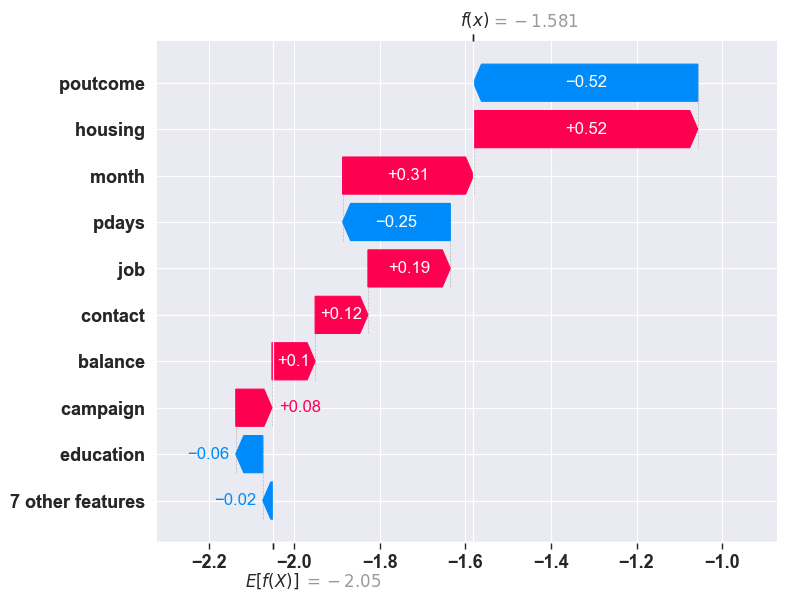

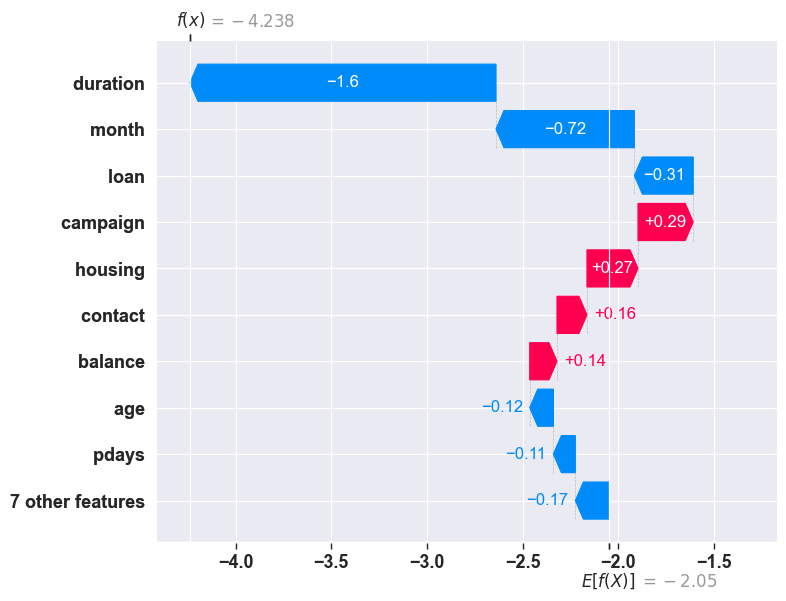

In [52]:
explainer = shap.TreeExplainer(xgb[1])
X_sample = pd.DataFrame(X_test_scaled[:5],columns=X.columns)  # Use the first 5 samples from the scaled test set
shap_values = explainer.shap_values(X_sample)

for i in range(5):
    plt.yticks(fontweight='bold')
    plt.xticks(fontweight='bold')

    shap.plots._waterfall.waterfall_legacy(
        explainer.expected_value,
        shap_values[i],
        X_sample.iloc[i]
        
    )
